# Pipeline age at time of incident

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('../data/processed/pipeline_incidents_2010_present_all_CLEAN.csv')
df.head(2)

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade,year_dt,pipeline_age
0,2/28/22,NO,YES,NO,20100001,15047,3/11/10,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,"PG&E - GAS OPERATIONS, REGULATORY COMPLIANCE 6...",SAN RAMON,CA,94583,2/13/10 23:35,NaN,NaN,2010.0,1617 EAST 9TH STREET,STOCKTON,SAN JOAQUIN,CA,95201,37.93188,-121.26133,102500,124764.082311,NO,0,0.0,0,OTHER OUTSIDE FORCE DAMAGE,OTHER OUTSIDE FORCE DAMAGE,OTHER,ALUMINUN,A FIRE AT AN UNOCCUPIED HOME OCCURRED AT APPRO...,10.0,NaN,NaN,NaN,NaN
1,2/28/22,NO,NO,NO,20100002,15553,3/12/10,SUPPLEMENTAL FINAL,13730,NORTHERN INDIANA PUBLIC SERVICE CO,801 E 86TH AVENUE,MERRILLVILLE,IN,46410,2/16/10 10:38,NaN,NaN,2010.0,3835 SANDPIPER COVE RUN,SOUTH BEND,ST. JOSEPH,IN,46628,41.72931,-86.27531,57500,68334.121206,NO,0,20.0,0,EXCAVATION DAMAGE,EXCAVATION DAMAGE BY THIRD PARTY,PLASTIC,NaN,"CONTRACTOR BORING ELECTRIC LINE PARALLEL TO 3""...",310.0,1990-01-01,1990-1999,1990.0,20.0


<AxesSubplot:>

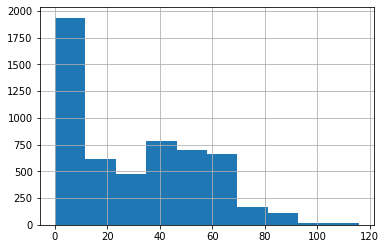

In [3]:
# Draft chart
df.pipeline_age.hist()

In [4]:
# Create dataframe with count of incidents for each age
df_count = df.pipeline_age.value_counts().sort_index().reset_index(name='count')
df_count.head()

,index,count
0,0.0,452
1,1.0,332
2,2.0,224
3,3.0,180
4,4.0,136


In [5]:
# Percent of incidents that occurred at each pipeline age
df.pipeline_age.value_counts(normalize=True).sort_values(ascending=False).head(5)

0.0    0.082347
1.0    0.060485
2.0    0.040809
3.0    0.032793
4.0    0.024777
Name: pipeline_age, dtype: float64

In [6]:
# df_count.to_csv('data/pipeline-age-at-time-of-incident.csv', index=False)

## Binning data into groups of 5 for chart

In [7]:
# Bin data by every 5

# Create lists of bins and labels
bins = np.arange(0, 25) * 5
labels = np.arange(1, 25) * 5

# Create new variable
df_count['binned'] = pd.cut(df_count['index'], bins, labels=labels)

# Convert variable data type to string
df_count['binned'] = df_count.binned.astype('str')

# replace NaN in binned - 0 pipeline_age - to be in the 0-5 bin
df_count['binned'] = df_count['binned'].str.replace('nan', '5')

df_count.head()

,index,count,binned
0,0.0,452,5
1,1.0,332,5
2,2.0,224,5
3,3.0,180,5
4,4.0,136,5


In [8]:
df_binned = df_count.groupby('binned', sort=False).agg({'count' : ['sum']}).reset_index().droplevel(0, axis=1)
df_binned.columns = ['pipeline_age_range', 'sum']
df_binned.head()

,pipeline_age_range,sum
0,5,1439
1,10,444
2,15,281
3,20,252
4,25,226


In [9]:
# Percent of incidents that occurred when pipelines were <5 years old
1439 / (df_binned['sum'].sum())

0.2621606850063764

In [10]:
df_binned.to_csv('../graphics/data/pipeline-age-at-time-of-incident-binned.csv', index=False)